In [55]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [419]:
#'''
# Neutron star specifications
m_NS = 2.16 # Tolman-Oppenheimer Volkoff limit (in solar masses)
r_NS = 3.0e4 # Radius of such a neutron star (in m)
j_NS = 1122 # spin of neutron star from implicit evidence (in rev/s)
#'''

'''
m_NS = 1e8 # Interstellar
r_NS = 1.48e11 # Interstellar
j_NS = 8.80275e57 # Interstellar
'''

# Death of universe specifications (how many years you want to be on the neutron star)
# [3.154e+7 seconds in a year]
sec_y = 3.154e7
dT_decay = 1e34*sec_y # Proton lifetime
dT_bigrip = 2.8e9*sec_y # Big Rip
dT_bigcrunch = 2.2e10*sec_y # Big Crunch
dT_int = sec_y # Interstellar years (1 hour (BH) = 7 years (U))

# Constants of nature
G = 6.673e-11 # Gravitational constant (in m^3*kg^-1*s^-2)
c = 3e8 # (in m/s)

# Observer specifications
r_obs = np.linspace(r_NS,r_NS+1e5,1000) # observer from neutron star surface to 100 km away
theta_obs = np.linspace(0,360,1000) # 360 deg around the neutron star

#'''
M = m_NS*1.989e+30 # (in kg)
J = j_NS
dT = [dT_decay, dT_bigrip, dT_bigcrunch, dT_int]
dT_string = ["Decay of Proton", "Big Rip", "Big Crunch", "Interstellar"]
#'''

[Decay of Proton] At maximum time dilation, the universe observer would see 2,123,615,519,999,999,881,399,386,731,708,416.00 more years pass than the neutron observer
[Big Rip] At maximum time dilation, the universe observer would see 594,612,345.60 more years pass than the neutron observer
[Big Crunch] At maximum time dilation, the universe observer would see 4,671,954,144.00 more years pass than the neutron observer
[Interstellar] At maximum time dilation, the universe observer would see 0.21 more years pass than the neutron observer


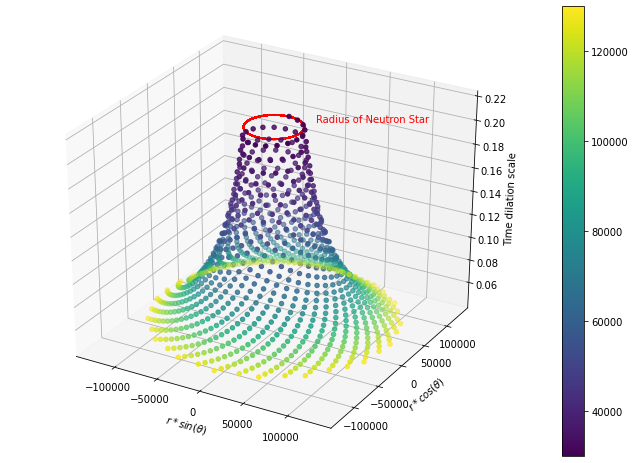

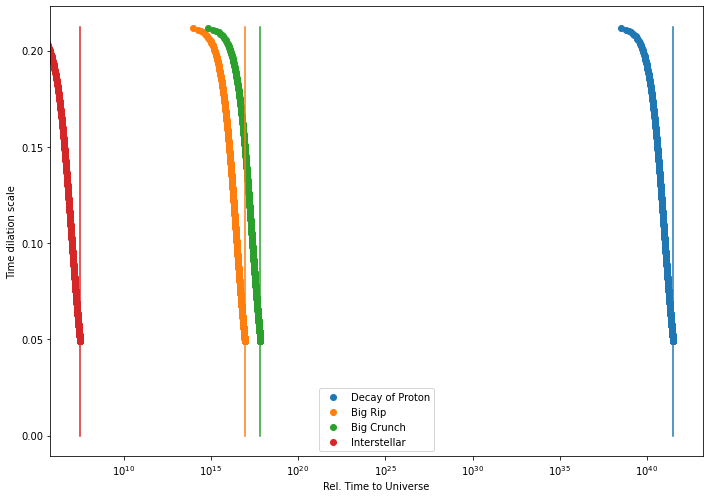

In [438]:
time_dilation = ((2*G*(M**3)*r_obs)/((c**2)*(M**2)*(r_obs**2)+(J**2)*(np.cos(theta_obs)**2))) # Time dilation using Kerr metric (for spinning black hole)

# For 3D plot
f = plt.figure(figsize=(11.69,8.27))
ax = f.gca(projection='3d')

# Plot a 3D plot around the neutron star with the color gradient as the radius away
dt_plot = ax.scatter3D(r_obs*np.sin(theta_obs), r_obs*np.cos(theta_obs), time_dilation, c=r_obs)    
# Show radius of neutron star
ax.plot3D(r_NS*np.sin(theta_obs), r_NS*np.cos(theta_obs), [np.max(time_dilation)]*1000, 'red')    
label = 'Radius of Neutron Star'
ax.text(r_NS, r_NS, np.max(time_dilation), label, color='red')
ax.set_xlabel(r'$r*sin(\theta)$')
ax.set_ylabel(r'$r*cos(\theta)$')
ax.set_zlabel('Time dilation scale');    
f.colorbar(dt_plot)

f = plt.figure(figsize=(11.69,8.27))
time_diff = []
for i,val in enumerate(dT):
    dt = np.linspace(0,dT[i],1000)
    plt.scatter(dt, time_dilation, label='%s' % dt_string[i])
    # line to denote 'death of universe' points
    plt.plot([dT[i],dT[i]],[0,np.max(time_dilation)])
    # Using maximum value of dt (i.e. Universe observer time) grab the corresponding time dilation value
    #time_diff.append((dT[i]+dT[i]*np.interp(61333, dt, time_dilation))/sec_y)
    time_diff.append((dT[i]*np.max(time_dilation))/sec_y)
plt.xscale('log')
#plt.xlim(1e5,1e35)
plt.xlabel('Rel. Time to Universe')
plt.ylabel('Time dilation scale')
plt.legend()

for i,val in enumerate(time_diff):
    '''
    The time dilation value is multiplied by neutron observer 
    to get the time passed for the universe observer
    '''
    print("[{}] At maximum time dilation, the universe observer would see {:,.2f} more years pass than the neutron observer".format(dt_string[i], time_diff[i]))